# Portada.

### P/E estimator.

In [23]:
### Libraries to use.
import pandas as pd 
import numpy as np
import yfinance as yf
import yahoo_fin.stock_info as si
import pandas_datareader.data as web
import datetime
#import fix_yahoo_finance  # pip install fix_yahoo_finance 
import matplotlib.pyplot as plt
%matplotlib inline

First, let's get the tickers of the companies we're interested in. [Click here to get them.](https://www.nasdaq.com/market-activity/stocks/screener)

In [4]:
### Import tickers.
tickers = pd.read_csv('Large_cap_growth_tickers.csv')

### Filter tickers with at least 5 years since IPO.
tickers['IPO Dif'] = datetime.datetime.now().year - tickers['IPO Year']
tickers = tickers[(tickers['IPO Dif'] > 5)]
tickers.head(10)

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry,IPO Dif
5,AKAM,Akamai Technologies Inc. Common Stock,$116.96,-0.66,-0.561%,1.906351e+10,United States,1999.0,1779685,Miscellaneous,Business Services,22.0
6,ALGN,Align Technology Inc. Common Stock,$627.92,8.27,1.335%,4.969144e+10,United States,2001.0,356263,Health Care,Industrial Specialties,20.0
7,ALNY,Alnylam Pharmaceuticals Inc. Common Stock,$181.81,1.72,0.955%,2.137086e+10,United States,2004.0,765310,Health Care,Major Pharmaceuticals,17.0
8,AMAT,Applied Materials Inc. Common Stock,$137.18,-0.82,-0.594%,1.253799e+11,United States,1972.0,5528852,Technology,Semiconductors,49.0
10,AMGN,Amgen Inc. Common Stock,$244.74,-0.11,-0.045%,1.406163e+11,United States,1983.0,1372060,Health Care,Major Pharmaceuticals,38.0
11,ANSS,ANSYS Inc. Common Stock,$358.23,3.85,1.086%,3.122031e+10,United States,1996.0,186296,Technology,Computer Software: Prepackaged Software,25.0
14,AVGO,Broadcom Inc. Common Stock,$476.33,-2.69,-0.562%,1.954194e+11,United States,2009.0,1211690,Technology,Semiconductors,12.0
16,BMRN,BioMarin Pharmaceutical Inc. Common Stock,$78.46,-1.19,-1.494%,1.433798e+10,United States,1999.0,593326,Health Care,Major Pharmaceuticals,22.0
19,CDW,CDW Corporation Common Stock,$177.46,0.21,0.118%,2.488052e+10,United States,2013.0,457815,Technology,EDP Services,8.0
20,CERN,Cerner Corporation Common Stock,$78.06,0.37,0.476%,2.352081e+10,United States,1986.0,1657073,Technology,EDP Services,35.0


In [5]:
### Make a list of all the available tickers.
tickers_list = tickers['Symbol'].tolist()

### Get the P/E ratio of the stocks.
PE_vector = {i: si.get_quote_table(i)['PE Ratio (TTM)'] for i in tickers_list}
PE_values = pd.DataFrame.from_dict(PE_vector, orient='index', columns=['P/E ratio'])
PE_values.index.name = 'Stocks'

PE_values.dropna(inplace=True)
PE_values

,P/E ratio
Stocks,
AKAM,33.61
ALGN,109.91
AMAT,28.66
AMGN,20.35
ANSS,69.03
...,...
VRTX,19.11
XLNX,51.68
XRAY,80.89


In [6]:
### Sorting values. Top 30 stocks with the lowest P/E ratio.
n_stocks = 30
best_stocks = PE_values.sort_values(by='P/E ratio')[0:n_stocks]

best_stocks

,P/E ratio
Stocks,
CG,9.28
HOLX,9.92
PFG,10.63
DISH,10.98
DLTR,16.19
REGN,16.52
TROW,17.58
EBAY,17.77
BMRN,18.40


In [7]:
# function for downloading adjusted close stock prices.

def get_adj_closes(tickers, start_date=None, end_date=None):
   
    closes = web.get_data_yahoo(tickers, start=start_date, end=end_date)
   
    closes = closes['Adj Close']
   
    closes.sort_index(inplace=True)
    return closes

In [57]:
### Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):

    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    
    return closes

In [14]:

# portfololio tickers

tickers=best_stocks.index.tolist()
tickers

['CG',
 'HOLX',
 'PFG',
 'DISH',
 'DLTR',
 'REGN',
 'TROW',
 'EBAY',
 'BMRN',
 'SBNY',
 'VRTX',
 'AMGN',
 'QCOM',
 'LOGI',
 'ORLY',
 'CTSH',
 'NTAP',
 'TSCO',
 'HSIC',
 'LPLA',
 'LRCX',
 'AMAT',
 'SSNC',
 'CERN',
 'CDW',
 'AKAM',
 'TTWO',
 'MXIM',
 'CTXS',
 'PAYX']

In [16]:
# selected time period

start_date = '2016-07-26'
end_date = '2021-07-26'

#downloading the data

closes = get_adj_closes(tickers, start_date, end_date)
closes.head()

Symbols,CG,HOLX,PFG,DISH,DLTR,REGN,TROW,EBAY,BMRN,SBNY,...,LRCX,AMAT,SSNC,CERN,CDW,AKAM,TTWO,MXIM,CTXS,PAYX
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-26,12.761315,36.830002,36.987186,52.200001,96.650002,398.269989,60.514229,30.306099,92.019997,115.961098,...,84.272575,25.074413,30.626759,60.753365,40.291462,58.090000,40.180000,35.802570,68.754135,52.290882
2016-07-27,12.472965,37.200001,36.838715,52.040001,95.720001,415.089996,60.625736,30.219236,98.089996,114.853745,...,84.603783,25.158583,30.183733,60.460575,40.244232,50.509998,40.450001,36.091373,67.715103,51.470760
2016-07-28,12.539506,38.270000,36.879959,53.470001,96.120003,411.040009,60.419861,30.084112,98.199997,114.314240,...,85.634163,24.896717,31.580240,60.743610,40.319798,50.689999,40.320000,35.592545,68.546333,50.962856
2016-07-29,12.776101,38.490002,38.463707,53.419998,96.290001,425.119995,60.634315,30.074459,99.419998,113.803154,...,82.588959,24.588076,31.031271,60.889999,40.546463,50.529999,40.180000,35.688805,68.600212,51.031727
2016-08-01,12.620835,38.980000,38.133751,53.480000,97.099998,434.000000,59.905224,30.161325,100.250000,113.187943,...,83.527374,24.569366,30.087423,60.724087,40.631474,50.599998,40.290001,35.960102,66.668343,51.014511


<AxesSubplot:xlabel='Date'>

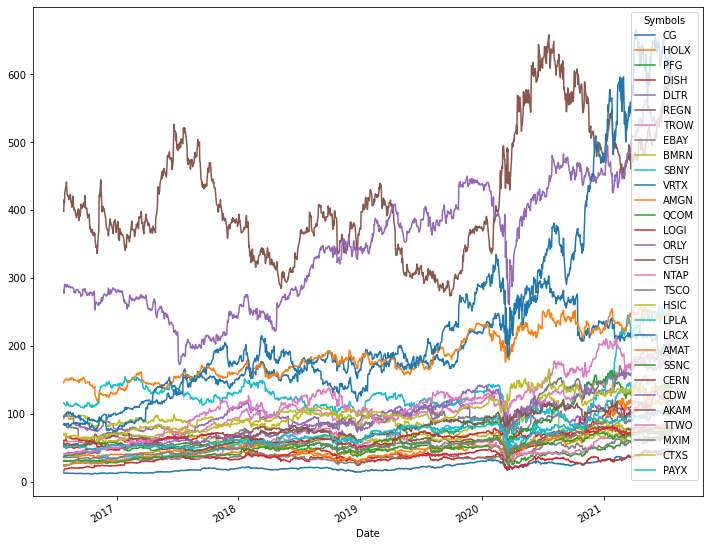

In [21]:
# Let's visualize our adjusted close prices in a graphic

closes.plot(figsize=[12,10])

In [18]:
# Let´s calculate the returns

ret = closes.pct_change().dropna()
ret.head()

Symbols,CG,HOLX,PFG,DISH,DLTR,REGN,TROW,EBAY,BMRN,SBNY,...,LRCX,AMAT,SSNC,CERN,CDW,AKAM,TTWO,MXIM,CTXS,PAYX
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-27,-0.022596,0.010046,-0.004014,-0.003065,-0.009622,0.042233,0.001843,-0.002866,0.065964,-0.009549,...,0.003930,0.003357,-0.014465,-0.004819,-0.001172,-0.130487,0.006720,0.008067,-0.015112,-0.015684
2016-07-28,0.005335,0.028763,0.001120,0.027479,0.004179,-0.009757,-0.003396,-0.004471,0.001121,-0.004697,...,0.012179,-0.010409,0.046267,0.004681,0.001878,0.003564,-0.003214,-0.013821,0.012275,-0.009868
2016-07-29,0.018868,0.005749,0.042943,-0.000935,0.001769,0.034255,0.003549,-0.000321,0.012424,-0.004471,...,-0.035561,-0.012397,-0.017383,0.002410,0.005622,-0.003156,-0.003472,0.002705,0.000786,0.001351
2016-08-01,-0.012153,0.012731,-0.008578,0.001123,0.008412,0.020888,-0.012024,0.002888,0.008348,-0.005406,...,0.011362,-0.000761,-0.030416,-0.002725,0.002097,0.001385,0.002738,0.007602,-0.028161,-0.000337
2016-08-02,-0.015231,0.001283,-0.020549,-0.080217,-0.008960,0.002074,-0.012027,-0.014720,-0.011771,-0.013463,...,-0.011675,-0.011420,-0.006082,-0.004339,-0.009066,-0.012648,-0.002978,-0.022390,-0.036366,-0.006412


<AxesSubplot:xlabel='Date'>

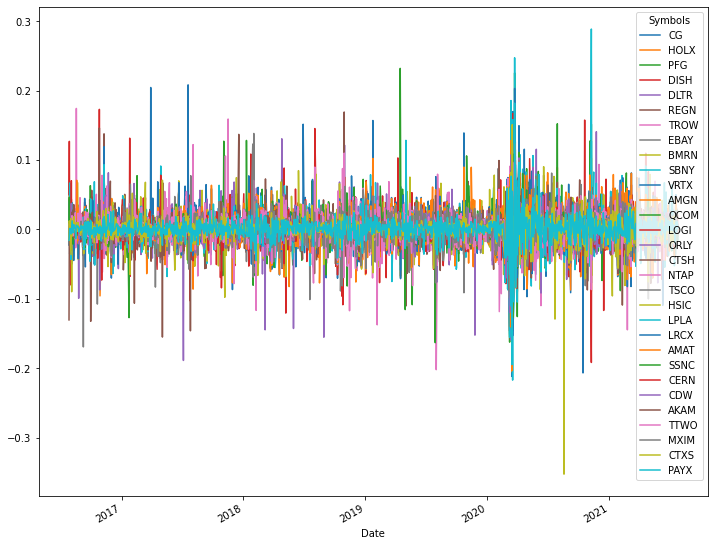

In [20]:
# Let's visualize our returns in a graphic

ret.plot(figsize=[12,10])

## Minimal Variance Portfolio

In [24]:
from scipy.optimize import minimize

In [26]:
# correlation matrix

corr = ret.corr()


In [27]:
# Let's calculate our anual returns and our anual std. deviation for evry asset

annual = pd.DataFrame({'Mean':ret.mean()*252, 'Std':ret.std()*np.sqrt(252)})
annual = annual.T
annual

Symbols,CG,HOLX,PFG,DISH,DLTR,REGN,TROW,EBAY,BMRN,SBNY,...,LRCX,AMAT,SSNC,CERN,CDW,AKAM,TTWO,MXIM,CTXS,PAYX
Mean,0.322144,0.178683,0.171069,0.045085,0.063690,0.130511,0.289699,0.218946,0.037886,0.220744,...,0.498651,0.429187,0.230237,0.080772,0.348917,0.195744,0.355268,0.251613,0.136270,0.188888
Std,0.347963,0.293444,0.362733,0.414436,0.330965,0.333066,0.294356,0.289893,0.371240,0.399647,...,0.432464,0.417240,0.313396,0.245554,0.308356,0.318312,0.355725,0.310003,0.257651,0.265310


## Risk free rate (annual)

>One year rate (we use it for the day 07/23/21)

https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield

In [28]:
#risk free rate

rf = 0.07/100

In [30]:
# From the mean variance dataframe calle annual 
# we create a matrix which the main diagonal is going to be the std. deviation of the assets
# This will help us to calculate the std. deviation of our portfolio.

S = np.diag(annual.loc['Std'])

In [31]:
# Building the parameters
# 1. Variance-Covariance matrix Sigma its equal to:
#  Sigma = S.dot(corr).dot(S)

Sigma = S.dot(corr).dot(S)

# 3. Eind: expected returns of individual assets
Eind = annual.loc['Mean']

In [32]:
# Building the minimun variance frontier

#Objective function
def var(w,Sigma):
    ''' Sigma is the variance-covariance matrix'''
    ''' w is a vector that contain the weights of each asset in the portfolio'''
    
    return w.T.dot(Sigma).dot(w)

In [33]:
# Initil values

w0 = np.ones(len(Eind))/len(Eind)

#Variables limits 
bnd = ((0,None),)*len(Eind)

# Restrictions
cons = ({'type':'eq','fun': lambda w: np.sum(w)-1},)

In [36]:
# Optimization
#Minimal Variance Portfolio

minvar=minimize(fun=var,x0=w0,args=(Sigma,),bounds=bnd,constraints=cons)
minvar

     fun: 0.029523512608973002
     jac: array([0.06025775, 0.05900617, 0.06752055, 0.07431001, 0.05879918,
       0.05896505, 0.06780331, 0.05929344, 0.06145421, 0.05875576,
       0.06370074, 0.05891846, 0.06738178, 0.05915878, 0.05880332,
       0.0592002 , 0.06944952, 0.05888207, 0.05920122, 0.06831357,
       0.08916058, 0.08717328, 0.06245583, 0.05899296, 0.06676905,
       0.05906852, 0.05924548, 0.06733371, 0.05925155, 0.06032138])
 message: 'Optimization terminated successfully'
    nfev: 342
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([0.00000000e+00, 3.60337394e-02, 5.97944492e-18, 0.00000000e+00,
       7.78766829e-02, 3.85189836e-02, 1.08871981e-17, 8.49947779e-02,
       0.00000000e+00, 3.14403573e-02, 0.00000000e+00, 8.77090148e-02,
       0.00000000e+00, 3.03226261e-02, 4.86565551e-02, 2.33267066e-04,
       1.35422272e-17, 6.94787335e-02, 8.08802594e-02, 2.81127384e-18,
       0.00000000e+00, 4.96014601e-18, 0.00000000e+00, 1.74911988e-01,
    

In [40]:
# Weights
w_minvar = minvar.x
#Porfolio risk
s_minvar = (var(w_minvar,Sigma))**(0.5)
#Expected return
E_minvar = Eind.dot(w_minvar)

#Sharp ratio
RS_minvar=(E_minvar-rf)/s_minvar

minvar_data = pd.DataFrame({'Std':s_minvar, 'E[r]':E_minvar,'Sharp ratio':RS_minvar},index=['minvar'])
minvar_data.T

,minvar
Std,0.171824
E[r],0.154917
Sharp ratio,0.897529


## Efficient Mean Variance Portfolio

In [41]:
# Objective function
# Now the optimization is respect to the sharp ratio

def menos_RS(w,Eind,Sigma,rf):
    ''' w is a vector that contain the weights of each asset in the portfolio '''
    ''' Eind expected returns of individual assets'''
    '''Sigma: Variace-Covariance Matrix'''
    '''rf: risk free rate'''
    return - ((Eind.T.dot(w))-rf)/((w.T.dot(Sigma).dot(w))**(0.5))

In [42]:
# Initial data
w0
# Variables limits
bnd
#Restrictions
cons

({'type': 'eq', 'fun': <function __main__.<lambda>(w)>},)

In [43]:
# Portfolio EMV
EMV = minimize(fun=menos_RS,x0=w0,args=(Eind,Sigma,rf,),bounds=bnd,constraints=cons)
EMV

     fun: -1.6766567251142097
     jac: array([ 7.11812824e-02,  2.85839304e-01,  5.84637851e-01,  1.17711309e+00,
        4.98793691e-01,  2.55389258e-01,  5.03343195e-02,  1.57627612e-02,
        8.93787846e-01,  1.42121047e-01,  1.69272795e-01,  2.12097645e-01,
        2.87006035e-01, -2.72648036e-03, -1.12518668e-03,  6.88004777e-01,
        4.40681726e-02, -2.71980464e-03,  4.82511297e-01, -2.72461772e-03,
       -2.77693570e-03,  2.18598992e-01,  3.73726010e-01,  3.76476064e-01,
       -2.68360972e-03,  1.16206512e-01, -2.79369950e-03,  3.54187325e-01,
        1.87220842e-01,  2.49528602e-01])
 message: 'Optimization terminated successfully'
    nfev: 280
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.00000000e+00, 0.00000000e+00, 5.37432643e-16, 1.53999717e-15,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.31492155e-16, 6.95675727e-17, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.96789334e-01, 0.00000000e+00, 0

In [51]:
# weights
W_EMV = EMV.x
# Portfolio Expected return
E_EMV = Eind.T.dot(W_EMV)
# Portfolio risk
S_EMV = var(W_EMV,Sigma)**0.5
# Sharp ratio
RS_EMV = (E_EMV-rf)/S_EMV

P_EMV = pd.DataFrame({'E[r]':E_EMV, 'std':S_EMV,'sharp ratio':RS_EMV},index=['P_EMV'])
P_EMV.T


,P_EMV
E[r],0.429623
std,0.255820
sharp ratio,1.676657


## Building the frontier

In [52]:
#covariance between the portfolios
cov_EMV_minvar = W_EMV.dot(Sigma).dot(w_minvar)

In [53]:
# Correlation between portfolios
corr_EMV_minvar=cov_EMV_minvar/(S_EMV*s_minvar)

In [54]:
# Vector  w
wp=np.linspace(0,1,100)

In [55]:
# Portfolios dataframe: 
# 1. Índex: i
# 2. Columns 1-2: w, 1-w
# 3. Columns 3-4: E[r], sigma
# 4. Columms 5: Sharpe ratio
fron_min_var = pd.DataFrame({'w':wp,'w(minvar)':1-wp,'Media':E_EMV*wp+(1-wp)*E_minvar,
                             'vol':(((wp*S_EMV)**2+(1-wp)**2*s_minvar**2+2*wp*(1-wp)*cov_EMV_minvar)**0.5),
                             'RS':((E_EMV*wp+(1-wp)*E_minvar)-rf)/((((wp*S_EMV)**2+(1-wp)**2*s_minvar**2+2*wp*(1-wp)*cov_EMV_minvar)**0.5))})
fron_min_var

,w,w(minvar),Media,vol,RS
0,0.000000,1.000000,0.154917,0.171824,0.897529
1,0.010101,0.989899,0.157692,0.171998,0.912756
2,0.020202,0.979798,0.160467,0.172189,0.927857
3,0.030303,0.969697,0.163242,0.172398,0.942827
4,0.040404,0.959596,0.166016,0.172625,0.957662
...,...,...,...,...,...
95,0.959596,0.040404,0.418523,0.250633,1.667070
96,0.969697,0.030303,0.421298,0.251922,1.669559
97,0.979798,0.020202,0.424073,0.253216,1.671986
98,0.989899,0.010101,0.426848,0.254515,1.674351


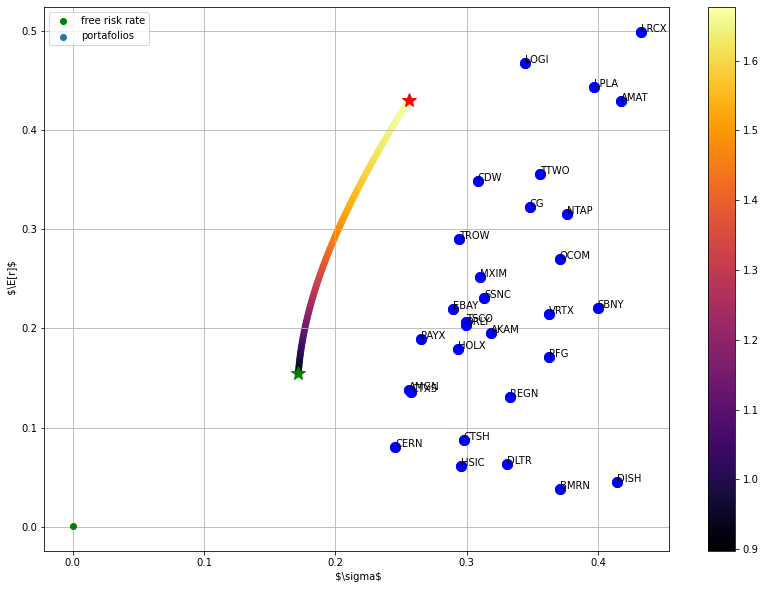

In [57]:
plt.figure(figsize=(14,10))
plt.xlabel(' $\sigma\$')
plt.ylabel(' $\E[r]\$')
# free risk rate
plt.plot(0,rf,'og',label='free risk rate')
#minvar portfolio
plt.plot(s_minvar,E_minvar,'*g',ms=15)
#EMV portfolio
plt.plot(S_EMV,E_EMV,'*r',ms=15)

#assets
for i in range(len(annual)):
    plt.plot(annual.loc['Std'],annual.loc['Mean'],'ob',ms=10)
for i in range(0,len(Eind)):
    plt.text(annual.iloc[1,i],annual.iloc[0,i],annual.columns[i])
plt.scatter(fron_min_var['vol'],fron_min_var['Media'],c=fron_min_var['RS'],cmap='inferno',label='portafolios')
plt.colorbar()
plt.grid()
plt.legend(loc='best')

In [34]:
# ### Get the final tickers names to get.
# tickers_to_get = best_stocks.index.values.tolist()

# ### Use our function to get the closes.
# get_adj_closes('AMZN', start_date='2018-01-01', end_date='2021-01-01')

In [35]:
# web.get_data_yahoo('AMZN')